# Hyperopt: Space Configuration

One of the most valuable offers of Hyperopt is the flexibility it provides to create priors over the hyperparameters distributions.

Hyperopt offers:

- Multiple distributions
- Possibility to combine distributions
- Possibility to create nested spaces
- Multiple configuration ways including lists, dictionaries and tuples


## Distributions

Taken from [hp documentation](http://hyperopt.github.io/hyperopt/getting-started/search_spaces/) 

- **hp.choice**: returns one of several options (suitable for categorical hyperparams)
- **hp.randint**: returns a random integer between 0 and an upper limit
- **hp.uniform**: returns a value uniformly between specified limits
- **hp.quniform**: Returns a value like round(uniform(low, high) / q) * q

**hp.quniform** would be an equivalent of randint (if q=1), but the upper **and lower** limits can be specified. hp.quniform also offers the possibility to use bigger values of q. So if we search for the optimal number of trees in a random forest, we could search hp.quniform('n_estimators', 10, 1000, 50), in which case we would sample between 10 and 1000 trees in increments of 50.

- **hp.loguniform**: draws values from exp(uniform(low, high)) so that the logarithm of the returned value is uniformly distributed
- **hp.qloguniform**: Returns a value like round(exp(uniform(low, high)) / q) * q (similar use and cautions to hp.quniform but for log-uniform distributions)
- **hp.normal**: draws from a normal distribution with specified mu and sigma
- **hp.qnormal**: Returns a value like round(normal(mu, sigma) / q) * q
- **hp.lognormal**: Returns a value drawn according to exp(normal(mu, sigma)) so that the logarithm of the return value is normally distributed
- **hp.qlognormal**: Returns a value like round(exp(normal(mu, sigma)) / q) * q

### Important for q distributions
Another thing to notice is that q-distributions (qnormal, quniform, etc) return floats, where the value of the hyperparameter needs to be an integer (otherwise most models will return an error). Thus, some re-casting is necessary to pass this value to the models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from hyperopt import hp
from hyperopt.pyll.stochastic import sample

# Distributions

## Numerical hyperparameters

In [2]:
# function to extract samples from the hyperparameter
# space and plot their distribution

def sample_and_plot(space, title):
    
    vals_ls = []
    
    for i in range(500):
        v = sample(space)
        v = v[0]['example']
        vals_ls.append(v)

    pd.Series(vals_ls).hist(bins=50)
    plt.title(title)
    plt.show()
    
    print('example values: ', vals_ls[0:5])

### randint

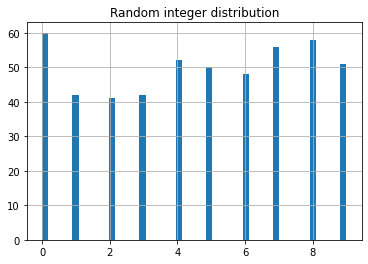

example values:  [array(9), array(5), array(0), array(2), array(1)]


In [3]:
# randint

space = [{'example' : hp.randint('example', 10)}]

sample_and_plot(space, 'Random integer distribution')

### uniform

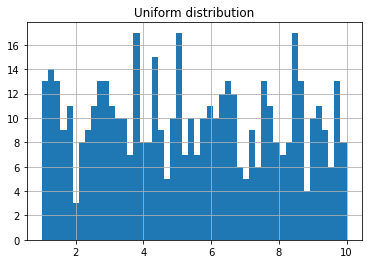

example values:  [9.666291230280084, 6.3437844426231225, 8.507591407135138, 2.2780203015942986, 3.016241228288695]


In [4]:
# uniform

space = [{'example' : hp.uniform('example', 1, 10)}]

sample_and_plot(space, 'Uniform distribution')

### quniform

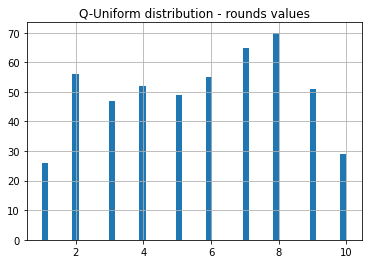

example values:  [7.0, 7.0, 7.0, 7.0, 7.0]


In [5]:
# quniform

space = [{'example' : hp.quniform('example', 1, 10, 1)}]

sample_and_plot(space, 'Q-Uniform distribution - rounds values')

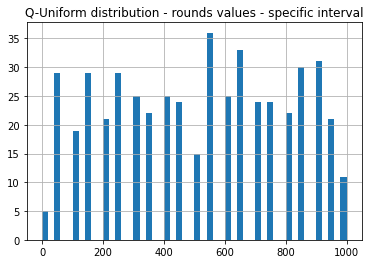

example values:  [700.0, 250.0, 300.0, 400.0, 600.0]


In [6]:
# with quniform we can change the limits (respect to randint)

space = [{'example' : hp.quniform('example', 10, 1000, 50)}]

sample_and_plot(space, 'Q-Uniform distribution - rounds values - specific interval')

### loguniform

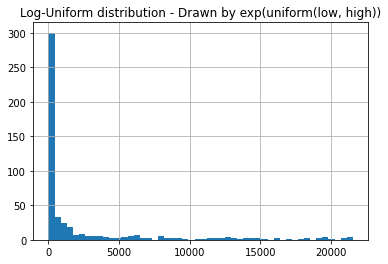

example values:  [473.9864349144676, 3.6612727114922916, 177.4854786799673, 6357.021504577825, 14657.565540211055]


In [7]:
# loguniform

space = [{'example' : hp.loguniform('example', 1, 10)}]

sample_and_plot(space, 'Log-Uniform distribution - Drawn by exp(uniform(low, high))')

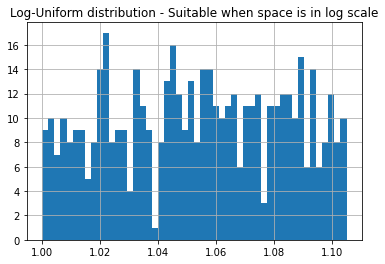

example values:  [1.034899161995344, 1.1050990464359915, 1.003120329132001, 1.0493419860698059, 1.028266562731713]


In [8]:
# Attention, the use of loguniform for floats < 1 is unintuitive
# (at least for me)

space = [{'example' : hp.loguniform('example', 0.000001, 0.1)}]

sample_and_plot(space, 'Log-Uniform distribution - Suitable when space is in log scale')

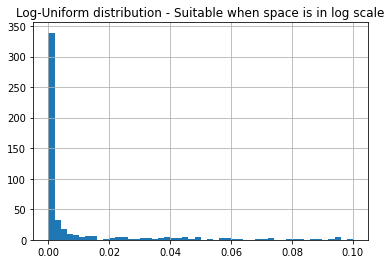

example values:  [3.4641206582308716e-05, 0.0036528170526602902, 0.014567465180859884, 2.5523431453410437e-06, 0.000658937633759833]


In [9]:
# if we want a log distribution over 0.000001, 0.1
# we need to enter it like this:

space = [{'example' : hp.loguniform('example', np.log(0.000001), np.log(0.1))}]

sample_and_plot(space, 'Log-Uniform distribution - Suitable when space is in log scale')

### q log uniform

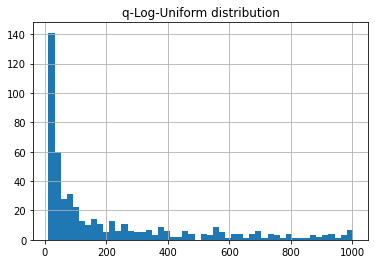

example values:  [50.856299070565896, 23.472138032568875, 82.15248311399107, 31.296184043425168, 74.32843710313477]


In [10]:
# qloguniform
# example we want to sample trees between 10 and 1000, in increments of 50
# but we think that better values are closer to smaller number of trees,
# so we want to sample more of those

space = [{'example': hp.qloguniform('example', np.log(10), np.log(1000), np.log(50))}]

sample_and_plot(space, 'q-Log-Uniform distribution')

### normal

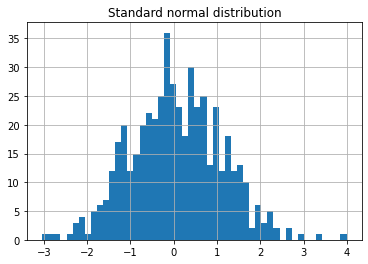

example values:  [-0.09843432524608378, -1.3357107311723113, -0.16978617141969352, 1.4982996378882862, 1.420729505241354]


In [11]:
# normal

# the standard normal
space = [{'example': hp.normal('example', 0, 1)}]

sample_and_plot(space, 'Standard normal distribution')

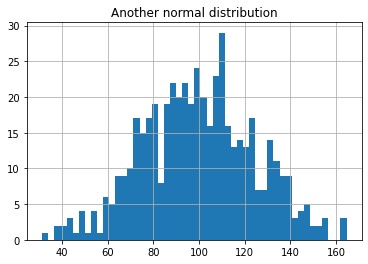

example values:  [91.77777780413346, 104.52000111967203, 116.24418873490889, 101.62502298410314, 66.8127420724104]


In [12]:
# normal

space = [{'example': hp.normal('example', 100, 25)}]

sample_and_plot(space, 'Another normal distribution')

### q normal

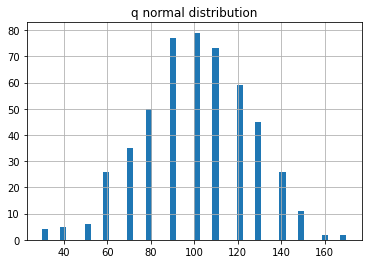

example values:  [110.0, 120.0, 90.0, 120.0, 90.0]


In [13]:
# qnormal
# same as previous but at discrete intervals

space = [{'example': hp.qnormal('example', 100, 25, 10)}]

sample_and_plot(space, 'q normal distribution')

### log normal

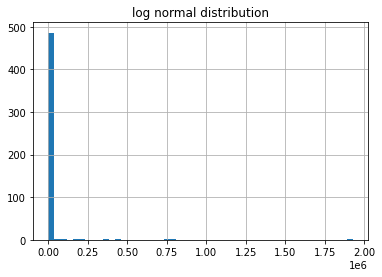

example values:  [3977.4356771270495, 108.52657050364566, 2.1912333162956266, 72.00855197934914, 4.618185713604202]


In [14]:
# lognormal

space = [{'example': hp.lognormal('example', np.log(100), np.log(25))}]

sample_and_plot(space, 'log normal distribution')

### q log normal

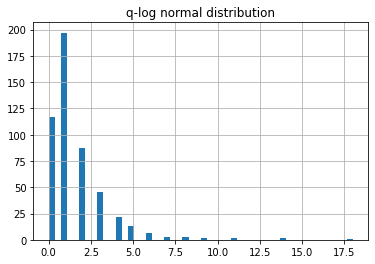

example values:  [0.0, 1.0, 2.0, 0.0, 1.0]


In [15]:
# q-lognormal

space = [{'example': hp.qlognormal('example', 0, 1, 1)}]

sample_and_plot(space, 'q-log normal distribution')

## Categorical hyperparameters

In [16]:
def sample_and_plot(space, title):
    
    vals_ls = []
    
    for i in range(500):
        v = sample(space)
        v = v[0]['example']
        vals_ls.append(v)

    pd.Series(vals_ls).value_counts().plot.bar()
    plt.title(title)
    plt.ylabel('Number of draws')
    plt.show()
    
    print('example values: ', vals_ls[0:5])

### choice

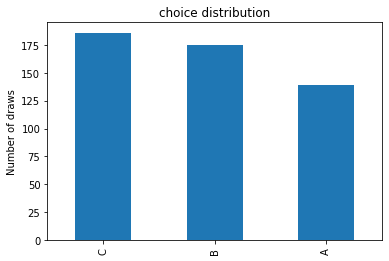

example values:  ['B', 'A', 'A', 'C', 'C']


In [17]:
# choice

space = [{'example': hp.choice('example', ['A', 'B', 'C'])}]

sample_and_plot(space, 'choice distribution')

### pchoice

Draws from a list with a user specified probability.

In [18]:
# pchoice

# example from the Hyperopt article

space = hp.pchoice('example', [
    (0.8, {'use_var': 'x', 'x': hp.normal('x', 0, 1)}),
    (0.2, {'use_var': 'y', 'y': hp.uniform('y', 1, 3)})])

In [19]:
# draw samples from space

for i in range(20):
        v = sample(space)
        print(v)

{'use_var': 'x', 'x': -0.9627664115073786}
{'use_var': 'y', 'y': 2.834109752208942}
{'use_var': 'y', 'y': 1.753719445630446}
{'use_var': 'y', 'y': 1.1471214853874536}
{'use_var': 'x', 'x': -0.9538104881315168}
{'use_var': 'x', 'x': -0.5738544011498543}
{'use_var': 'x', 'x': 0.09641371410637756}
{'use_var': 'x', 'x': -1.9879868441210828}
{'use_var': 'x', 'x': 1.3961076796605627}
{'use_var': 'y', 'y': 1.4991541882540904}
{'use_var': 'x', 'x': -2.2268068289313008}
{'use_var': 'y', 'y': 1.5792049889908168}
{'use_var': 'y', 'y': 2.542382825396989}
{'use_var': 'x', 'x': 1.5600440240878957}
{'use_var': 'x', 'x': -1.245852518910933}
{'use_var': 'x', 'x': -0.2609440890992606}
{'use_var': 'x', 'x': -0.06510607342001155}
{'use_var': 'x', 'x': 0.8424982676658782}
{'use_var': 'x', 'x': -0.9332204823708482}
{'use_var': 'y', 'y': 2.3764046541653414}


In [20]:
# our own example, realistic, 

# if we want to sample
# a loss function but think that deviance is likely better
# than exponential

space = hp.pchoice('example', [
    (0.8, {'loss': 'deviance'}),
    (0.2, {'loss': 'exponential'})])

# draw samples from space

for i in range(20):
        v = sample(space)
        print(v)

{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'exponential'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'exponential'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'exponential'}
{'loss': 'deviance'}
{'loss': 'exponential'}


In [21]:
# our own example, continuing from choice

space = hp.pchoice('example', [
    (0.8, {'use_var': 'x', 'x': hp.choice('a', ['A', 'B'])}),
    (0.2, {'use_var': 'y', 'y': hp.choice('a', ['C', 'D'])})])

In [22]:
# draw samples from space

for i in range(20):
        v = sample(space)
        print(v)

{'use_var': 'x', 'x': 'B'}
{'use_var': 'x', 'x': 'A'}
{'use_var': 'x', 'x': 'A'}
{'use_var': 'x', 'x': 'B'}
{'use_var': 'x', 'x': 'A'}
{'use_var': 'x', 'x': 'A'}
{'use_var': 'x', 'x': 'A'}
{'use_var': 'x', 'x': 'B'}
{'use_var': 'y', 'y': 'C'}
{'use_var': 'x', 'x': 'B'}
{'use_var': 'y', 'y': 'C'}
{'use_var': 'x', 'x': 'B'}
{'use_var': 'x', 'x': 'A'}
{'use_var': 'x', 'x': 'A'}
{'use_var': 'y', 'y': 'D'}
{'use_var': 'x', 'x': 'B'}
{'use_var': 'y', 'y': 'C'}
{'use_var': 'x', 'x': 'B'}
{'use_var': 'x', 'x': 'A'}
{'use_var': 'x', 'x': 'B'}


In [23]:
# capture data in a dataframe

vals_ls = []
for i in range(500):
        v = sample(space)
        vals_ls.append(v)
        
v = pd.DataFrame(vals_ls)
v.head()

,use_var,x,y
0,x,B,NaN
1,y,NaN,C
2,y,NaN,C
3,x,A,NaN
4,y,NaN,D


In [24]:
v['use_var'].value_counts(normalize=True)

x    0.776
y    0.224
Name: use_var, dtype: float64

In [25]:
v['x'].value_counts(normalize=True, dropna=True)

B    0.512887
A    0.487113
Name: x, dtype: float64

In [26]:
v['x'].value_counts(normalize=True, dropna=False)

B      0.398
A      0.378
NaN    0.224
Name: x, dtype: float64

In [27]:
v['y'].value_counts(normalize=True)

D    0.5
C    0.5
Name: y, dtype: float64

In [28]:
v['y'].value_counts(normalize=True, dropna=False)

NaN    0.776
D      0.112
C      0.112
Name: y, dtype: float64

## Nested spaces

In [29]:
space = hp.choice('classifier_type', [
    {
        'type': 'naive_bayes',
    },
    {
        'type': 'svm',
        'C': hp.lognormal('svm_C', 0, 1),
        'kernel': hp.choice('svm_kernel', [
            {'ktype': 'linear'},
            {'ktype': 'RBF', 'width': hp.lognormal('svm_rbf_width', 0, 1)},
            ]),
    },
    {
        'type': 'dtree',
        'criterion': hp.choice('dtree_criterion', ['gini', 'entropy']),
        'max_depth': hp.choice('dtree_max_depth',
            [None, hp.qlognormal('dtree_max_depth_int', 3, 1, 1)]),
        'min_samples_split': hp.qlognormal('dtree_min_samples_split', 2, 1, 1),
    },
    ])

In [30]:
for i in range(20):
        v = sample(space)
        print(v)
        print()

{'type': 'naive_bayes'}

{'C': 0.23137349726677672, 'kernel': {'ktype': 'linear'}, 'type': 'svm'}

{'type': 'naive_bayes'}

{'C': 2.719034009530467, 'kernel': {'ktype': 'linear'}, 'type': 'svm'}

{'type': 'naive_bayes'}

{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 11.0, 'type': 'dtree'}

{'type': 'naive_bayes'}

{'criterion': 'gini', 'max_depth': 20.0, 'min_samples_split': 3.0, 'type': 'dtree'}

{'C': 8.85595117321934, 'kernel': {'ktype': 'RBF', 'width': 0.08223478467564992}, 'type': 'svm'}

{'type': 'naive_bayes'}

{'C': 0.2468621325735123, 'kernel': {'ktype': 'RBF', 'width': 3.331291692028551}, 'type': 'svm'}

{'criterion': 'gini', 'max_depth': 2.0, 'min_samples_split': 29.0, 'type': 'dtree'}

{'C': 0.13958245411848003, 'kernel': {'ktype': 'RBF', 'width': 1.5644677090849661}, 'type': 'svm'}

{'criterion': 'entropy', 'max_depth': 2.0, 'min_samples_split': 5.0, 'type': 'dtree'}

{'type': 'naive_bayes'}

{'type': 'naive_bayes'}

{'type': 'naive_bayes'}

{'criterion'